In [1]:
#set specific working directory
#setwd("~/Desktop/R_STUFF")

# load performance improvement libraries & enable just in time compiler
library(compiler)
enableJIT(1)

#some environmental variables (decimals)
options=7
options(citr.use_betterbiblatex = FALSE)

[1] 3

In [2]:
#check if required packages are there - if not install them!
requiredPackages = c('gdata','compiler','lsr','sft','nlme', 'lme4', 'bibtex', 'psych', 'likert', 'ggplot2', 'tidyverse')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) install.packages(p)
  library(p,character.only = TRUE)
}
#load all the libraries    
lapply(requiredPackages, require, character.only = TRUE)

Loading required package: gdata
gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith

Loading required package: lsr
Loading required package: sft
Warning message:
“package ‘sft’ was built under R version 3.4.3”Loading required package: fda
Warning message:
“package ‘fda’ was built under R version 3.4.1”Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: SuppDists
Loading required package: nlme
Loading required package: lme4

Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList

Loading required package: bibtex

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

In [3]:
# Importing the data 
data <- read.xls("TimeAnalysis2_1.xlsx", verbose=FALSE, na.strings=c("NA"))

In [4]:
# quick check on the data
head(data)

ParticipantNo,ID,PDF,Order,Time,Condition,CExperience,Tasks,Error
1,-JjAzwjQakZk-3kIbeMfw,U2PXr4iMBf8Kt-leQI8Ii,1,435,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,4gIe5sni3WJJCzNglSdo8,2,582,0,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,iHbGgWtrKNfksdoj9Hxv9,3,297,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,cnDXl97I_WoVUqyIH0HbQ,4,610,0,1,9,0
2,hNQKTiKtHSY_BmxLyZb9Q,XOCbiBddVQK3BYy1Ox4lI,1,306,1,1,8,0
2,hNQKTiKtHSY_BmxLyZb9Q,oOAy7INgRLumTV3vZWtVM,2,127,1,1,8,0


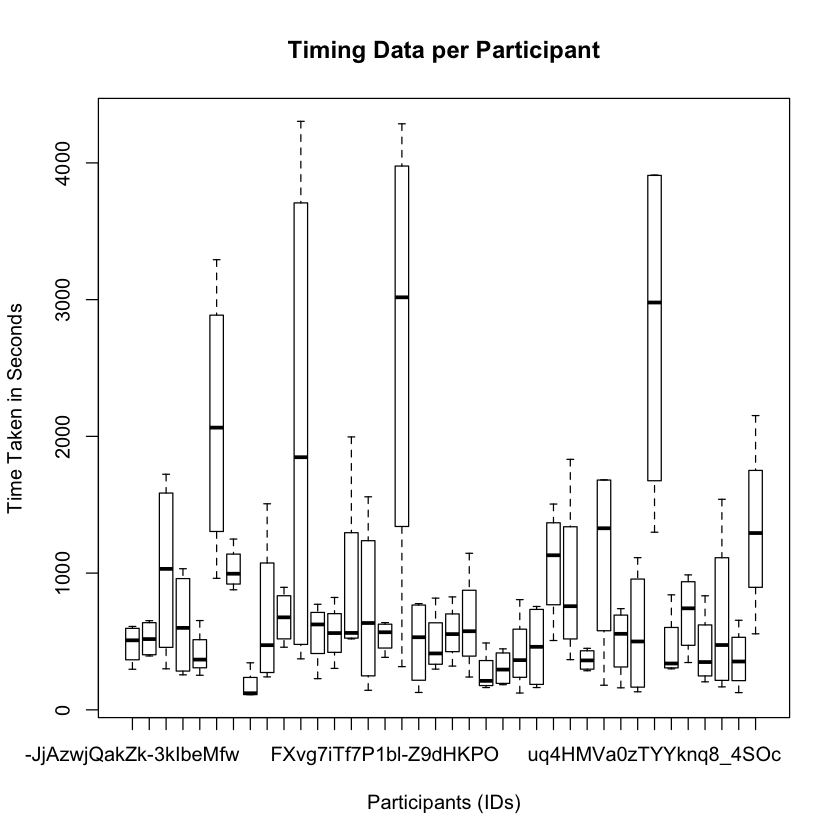

In [14]:
# Lets have a look at the time per participant
boxplot(Time~ID, main="Timing Data per Participant", xlab='Participants (IDs)', ylab='Time Taken in Seconds', data=data)

The majority of people seem to stay within 2000s. Only about ~4 people took longer to complete the study. 

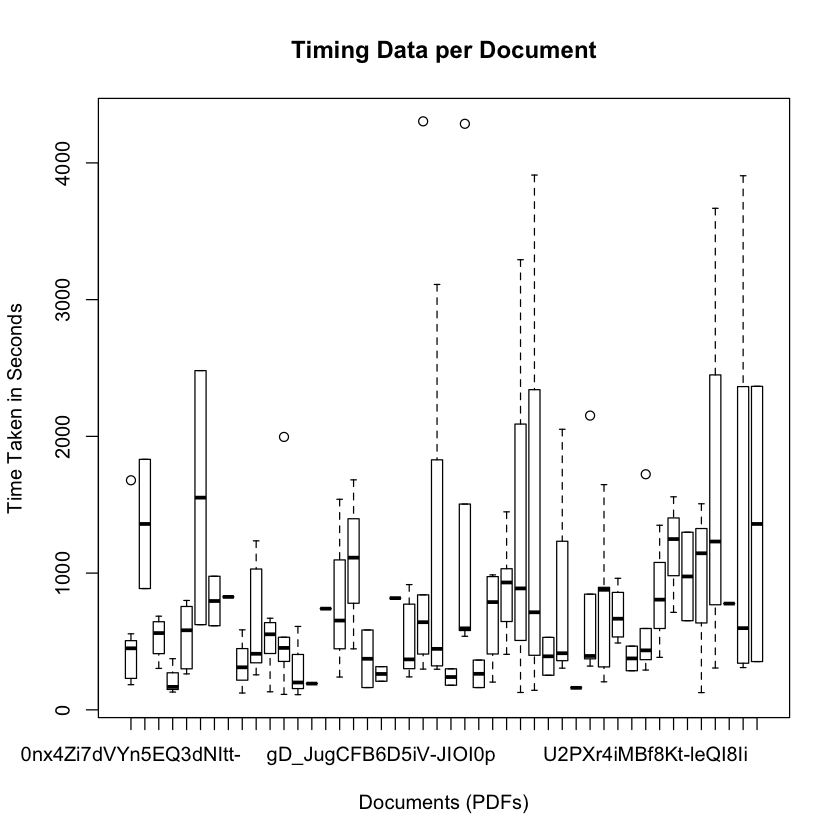

In [13]:
# Are there particular papers that stand out in therms of timing?
boxplot(Time~PDF, main="Timing Data per Document", xlab='Documents (PDFs)', ylab='Time Taken in Seconds',data=data)

Hm there are quite a few PDFs that too quite some time to complete. Will make a better graph for this to see more detail.

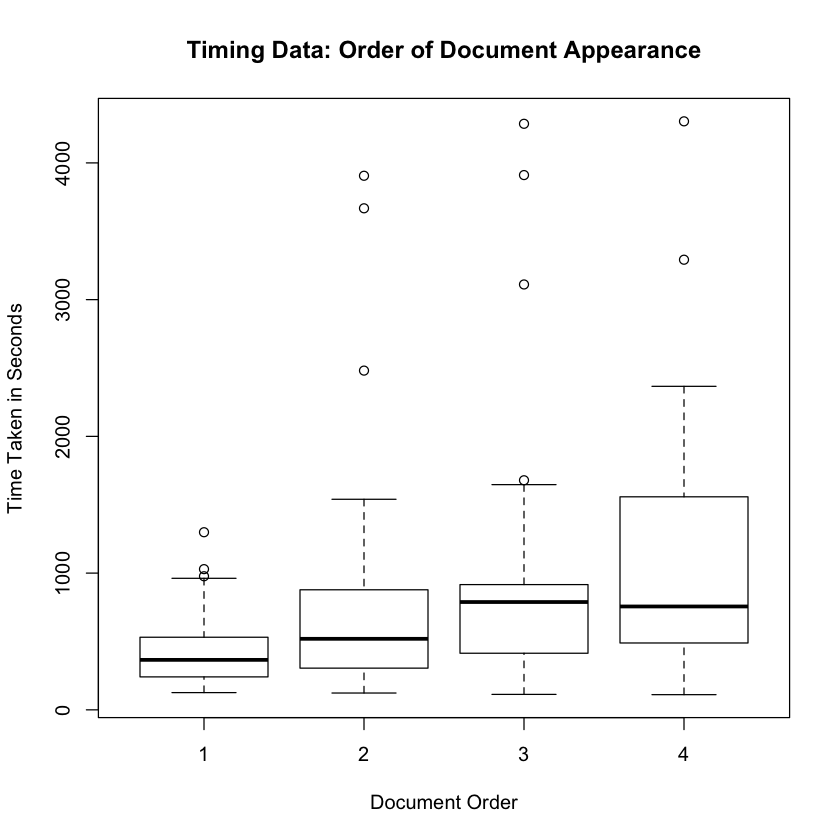

In [15]:
# Lets have a look at the order -> Fatique effects?
boxplot(Time~Order, main="Timing Data: Order of Document Appearance", xlab='Document Order', ylab='Time Taken in Seconds', data=data)

As expected: Participants take more time when they go through the study. By eye-balling the box-plots its clear they almost use double the time when they see the 4th paper than the 1st.

In [23]:
# Now lets have a look if the number of tasks participants completed had an influence here:e
# Number of tasks was the sum of tasks completed stated by participants in this question:

<img src="tasks.png">

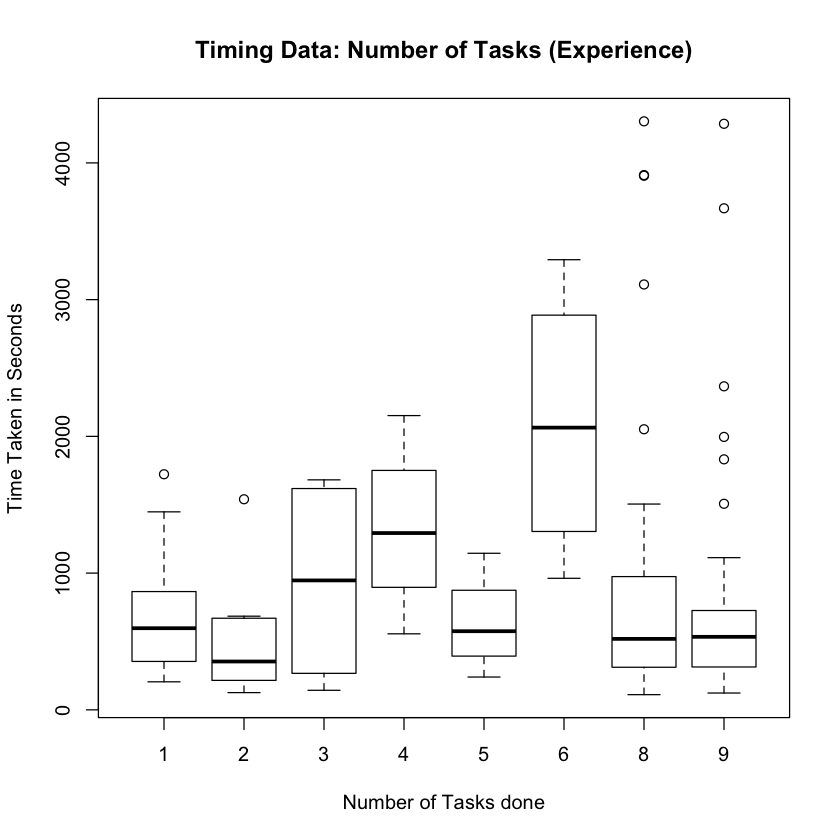

In [24]:
boxplot(Time~Tasks, main="Timing Data: Number of Tasks (Experience)", xlab='Number of Tasks done', ylab='Time Taken in Seconds', data=data)

Interesting - looks like there is something going on here! Need more detailed analysis:


####  just a quick check if there is a significant difference between the groups 
#### in terms of order and time:

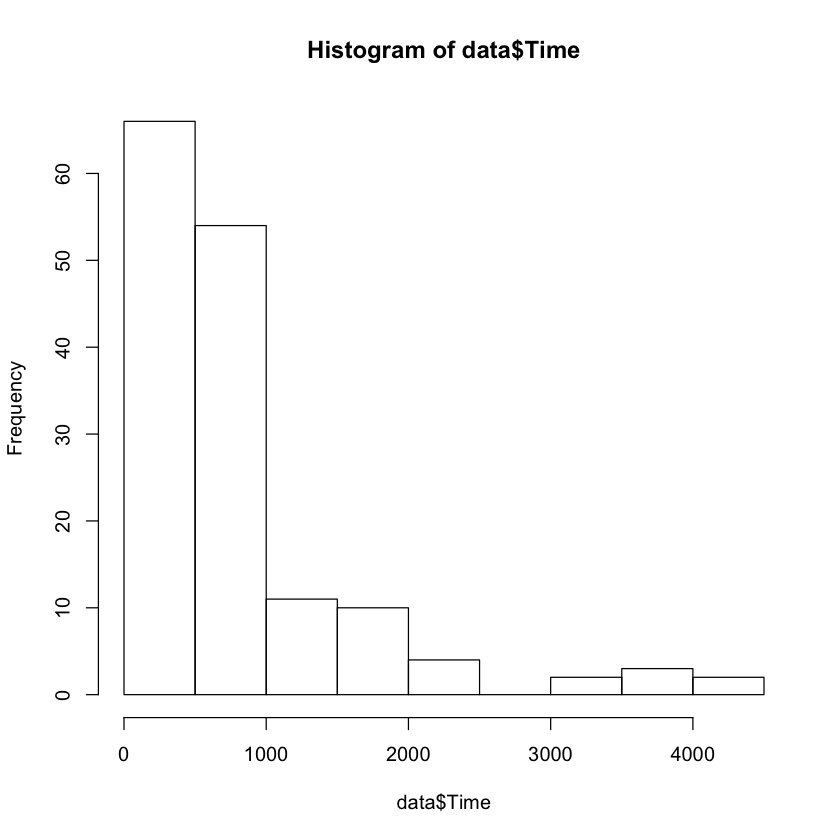

In [16]:
# Fist a quick check on the data (distribution)
hist(data$Time)

Looks like a poisson distribution with lambda=1 !

In [17]:
shapiro.test(data$Time)


	Shapiro-Wilk normality test

data:  data$Time
W = 0.70175, p-value = 3.453e-16


The Shapiro-Wilk test (there are several tests for this I just picked this one - no preference) showed that its significant: $p<0.05$ which means the data evaluated here is highly unlikely to be taken from a normal distribution - this confirms the historgram.

In [18]:
# Now as the data is non-parametric, and we look for differences in the data
# with two conditions (one indepencent variable as we just had one manipulation:
# annotations/no-annotations)) which means we need a Wilcoxion Rank Sum test here:


In [20]:
wilcox.test(data$Time,data$Condition,paired=TRUE)
wilcox.test(data$Time,data$Tasks,paired=TRUE)
wilcox.test(data$Time,data$Order,paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  data$Time and data$Condition
V = 11628, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  data$Time and data$Tasks
V = 11628, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  data$Time and data$Order
V = 11628, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Hm looks like all of the significance tests came back significant. 